# Introduction to Machine Learning - Linear Regression

**Author:** Taylor Martin

**Repository:** https://github.com/tmartin-m/datafun-07-applied


In [19]:
import pandas as pd
import seaborn as sns 
import matplotlib
import numpy
import scipy

from scipy import stats

## Part 1 - Chart a Straight Line

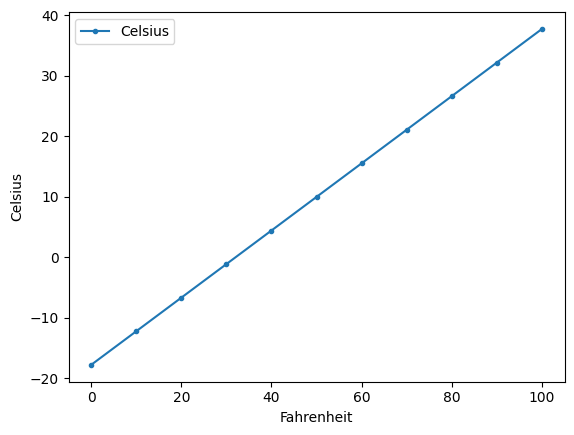

In [20]:
c = lambda f: 5/9*(f-32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquistion

In [21]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')


### Section 2 - Data Inspection

In [22]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [23]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [24]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [25]:
nyc_df.Date.dtype

dtype('int64')

In [26]:
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [27]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [29]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

In [30]:
linear_regression.slope

np.float64(0.014771361132966163)

In [31]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict

In [32]:
linear_regression.slope * 2019 + linear_regression.intercept

np.float64(38.51837136113297)

In [33]:
linear_regression.slope * 1890 + linear_regression.intercept

np.float64(36.612865774980335)

### Section 7 - Visualizations

(10.0, 70.0)

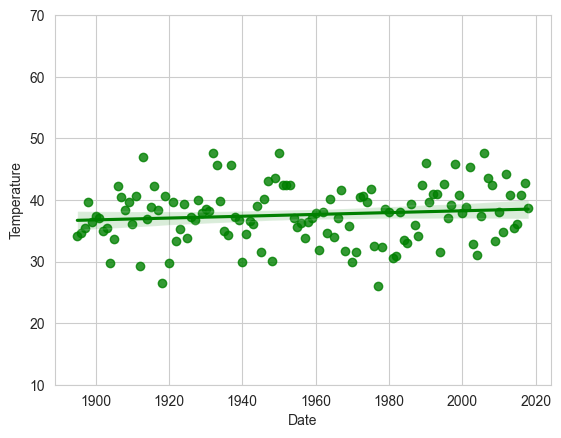

In [35]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature, color='green')
axes.set_ylim(10, 70)

## Part 3 - Prediction

### Section 1 - Build the Model

### Section 2 - Test the Model

### Section 3 - Predict

### Section 4 - Visualizations